In [431]:
#Really need these
import pandas as pd 
import numpy as np
from numpy import *
import seaborn as sns
#Date stuff
from datetime import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt
#Do some statistics
from scipy.misc import imread
from scipy import sparse
import scipy.stats as ss
import math

#Nice graphing tools
import matplotlib
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.tools as tls
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.ensemble import RandomForestRegressor
from sklearn.utils.validation import check_X_y, check_is_fitted
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from scipy import sparse

## Performance measures
from sklearn.metrics import mean_squared_error

In [495]:
np.random.seed(100) #set the seed for random generator

In [496]:


def read_data(input_dir='Resources/'): #read the initial data
    train = pd.read_csv(input_dir+'train.csv')
    test = pd.read_csv(input_dir+'test.csv')
    train['Split'] = 'Train'
    test['Split'] = 'Test'
    return train,test

In [497]:
train,test=read_data()
df = pd.concat([train,test],axis=0,sort=False) 

In [583]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.0,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...,2011-08-19,93212.89,0.0,0.00,5977.32
1,Store_26,Dept_92,2012-08-24,88145.09,IsHoliday_False,62.08,3.874,4507.08,33.6,149.46,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...,2012-08-17,93212.89,1.0,0.00,5067.80
2,Store_26,Dept_92,2011-08-05,96906.53,IsHoliday_False,63.16,3.903,0.00,0.0,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...,2011-07-29,80427.06,1.0,12785.83,-3693.64
3,Store_26,Dept_92,2012-08-10,111812.56,IsHoliday_False,67.01,3.772,5732.23,17.6,6.45,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...,2012-08-03,93890.07,1.0,-677.18,-18599.67
4,Store_26,Dept_92,2012-08-17,93212.89,IsHoliday_False,65.54,3.840,2430.95,16.0,5.54,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...,2012-08-10,111812.56,1.0,-18599.67,0.00


In [582]:
test.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.0,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...,2011-08-19,93212.89,0.0,0.00,5977.32
1,Store_26,Dept_92,2012-08-24,88145.09,IsHoliday_False,62.08,3.874,4507.08,33.6,149.46,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...,2012-08-17,93212.89,1.0,0.00,5067.80
2,Store_26,Dept_92,2011-08-05,96906.53,IsHoliday_False,63.16,3.903,0.00,0.0,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...,2011-07-29,80427.06,1.0,12785.83,-3693.64
3,Store_26,Dept_92,2012-08-10,111812.56,IsHoliday_False,67.01,3.772,5732.23,17.6,6.45,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...,2012-08-03,93890.07,1.0,-677.18,-18599.67
4,Store_26,Dept_92,2012-08-17,93212.89,IsHoliday_False,65.54,3.840,2430.95,16.0,5.54,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...,2012-08-10,111812.56,1.0,-18599.67,0.00


In [500]:
train.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,282451.000000,282451.000000,282451.000000,282451.000000,282451.000000,100520.000000,74232.000000,91521.000000,90031.000000,101029.000000,282451.000000,282451.000000,282451.000000
mean,22.193166,44.286138,15983.429692,60.113640,3.360300,7246.077559,3318.408122,1417.397841,3379.591745,4639.476021,171.207802,7.968098,136730.073220
std,12.782138,30.503641,22661.092494,18.446485,0.458602,8254.606267,9485.575898,9547.858949,6269.428446,6060.459590,39.160808,1.868070,61002.319363
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.330000,46.780000,2.932000,2241.190000,40.960000,5.060000,508.100000,1877.810000,132.022667,6.891000,93638.000000
50%,22.000000,38.000000,7616.550000,62.150000,3.452000,5363.520000,191.820000,24.340000,1482.030000,3364.410000,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20245.745000,74.290000,3.737000,9235.590000,1919.790000,103.130000,3607.570000,5563.800000,212.464799,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [501]:
train['DateTimeObj']=[dt.strptime(x,'%Y-%m-%d') for x in list(train['Date'])]
train['DateTimeObj'].head()

0   2011-08-26
1   2011-03-25
2   2010-12-03
3   2010-09-17
4   2012-05-18
Name: DateTimeObj, dtype: datetime64[ns]

In [502]:
sns.set()



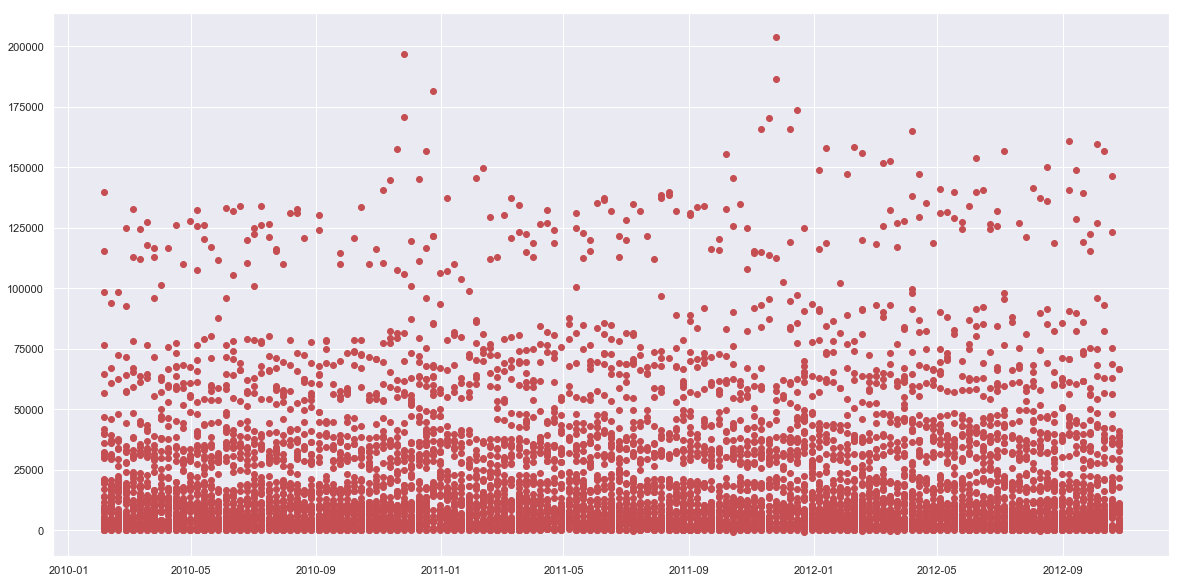

In [503]:
plt.figure(figsize=(20,10))
plt.plot(train[(train.Store==1)].DateTimeObj, train[(train.Store==1)].Weekly_Sales, 'ro')
plt.show()

# plt.tight_layout()

In [504]:

weeklysales=train.groupby(['Store','Date'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysales[0:5]

Store  Date      
1      2010-02-05    1112466.82
       2010-02-12     792483.02
       2010-02-19     799708.54
       2010-02-26     968441.71
       2010-03-05    1021063.19
Name: Weekly_Sales, dtype: float64

In [505]:
weeklysaledept=train.groupby(['Store','Dept'])['Weekly_Sales'].apply(lambda x:np.sum(x))
weeklysaledept[0:5]

Store  Dept
1      1       2064924.04
       2       4512530.61
       3       1234435.21
       4       3498773.90
       5       2420181.30
Name: Weekly_Sales, dtype: float64

In [506]:

weeklyscale=weeklysales.reset_index()
weeklyscale[0:5]

,Store,Date,Weekly_Sales
0,1,2010-02-05,1112466.82
1,1,2010-02-12,792483.02
2,1,2010-02-19,799708.54
3,1,2010-02-26,968441.71
4,1,2010-03-05,1021063.19


In [507]:
def plot_corr(df):
    f, ax = plt.subplots(figsize=(10, 8))
    mask = np.zeros_like(df.corr())
    mask[np.triu_indices_from(mask)] = True
    sns.heatmap(df.corr(), mask=mask, cmap=sns.light_palette("navy"), linewidths=.75 )

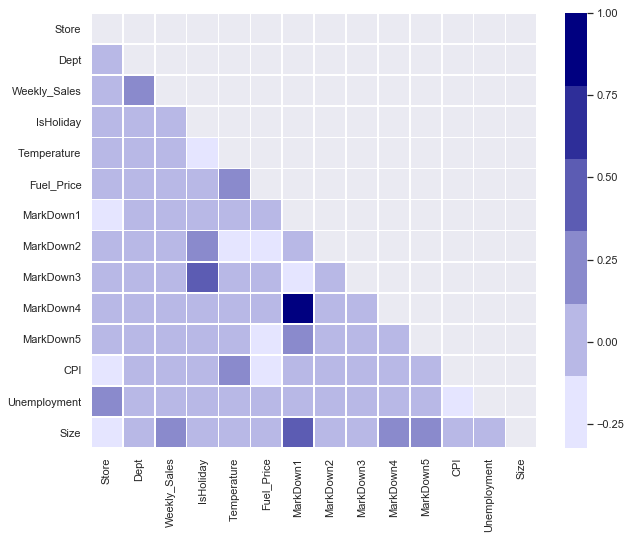

In [508]:
 plot_corr(df)

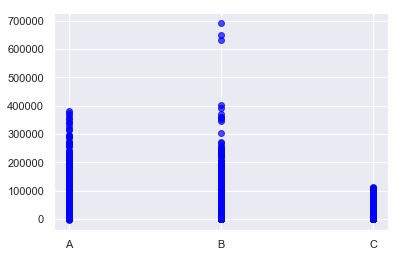

In [509]:
plt.scatter(df['Type'], df['Weekly_Sales'],alpha=0.7,color='blue')

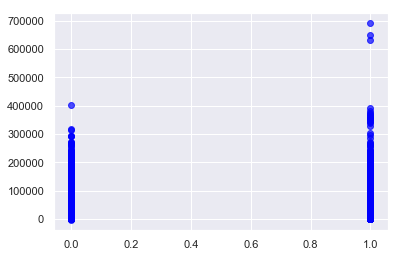

In [510]:
plt.scatter(df['IsHoliday'], df['Weekly_Sales'],alpha=0.7,color='blue')

In [511]:

    
# test.head()

In [512]:
train['Date']=pd.to_datetime(train['Date'])
train['Date'].dtype

dtype('<M8[ns]')

In [513]:
ts = train.groupby('Date')['Weekly_Sales'].sum().reset_index()

Summing all the cumulative sales of different stores on the same dates together

In [514]:
ts = ts.set_index('Date')
ts.index

DatetimeIndex(['2010-02-05', '2010-02-12', '2010-02-19', '2010-02-26',
               '2010-03-05', '2010-03-12', '2010-03-19', '2010-03-26',
               '2010-04-02', '2010-04-09',
               ...
               '2012-08-24', '2012-08-31', '2012-09-07', '2012-09-14',
               '2012-09-21', '2012-09-28', '2012-10-05', '2012-10-12',
               '2012-10-19', '2012-10-26'],
              dtype='datetime64[ns]', name='Date', length=143, freq=None)

In [515]:

ts.index.name = 'Date'

# Cumulative Sales Plot:
The graph shows sales from the stores in US. We can notice that sales increases every year just before new year.

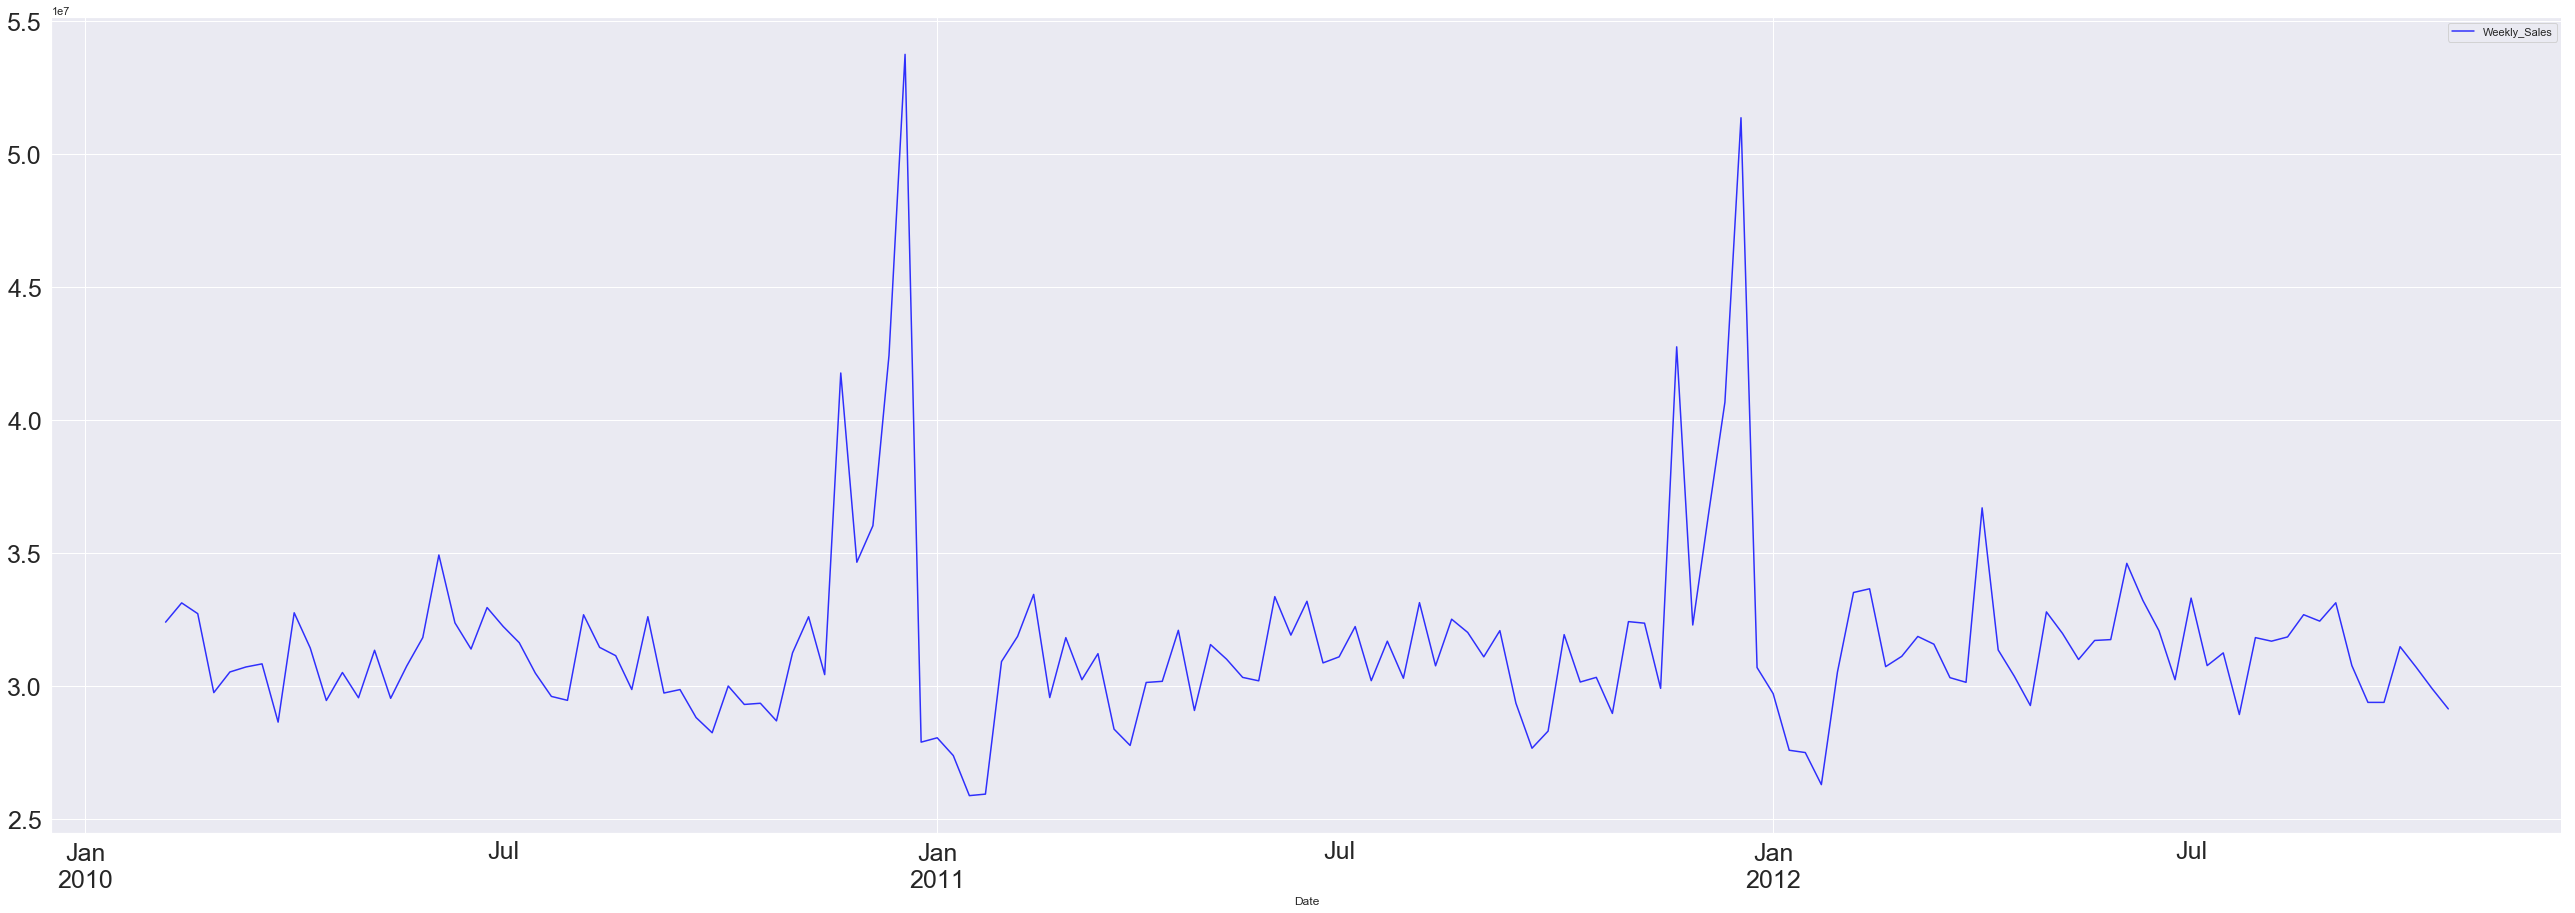

In [516]:
ts.plot(figsize=(45,15),color="blue",alpha=0.8,fontsize=25)


In [517]:
df=train

In [518]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,Test
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,Test
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,Test
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638,Test
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622,Test


In [519]:
def feature_engineer_markdown(df):
    df = df.assign(md1_present = df.MarkDown1.notnull())
    df = df.assign(md2_present = df.MarkDown2.notnull())
    df = df.assign(md3_present = df.MarkDown3.notnull())
    df = df.assign(md4_present = df.MarkDown4.notnull())
    df = df.assign(md5_present = df.MarkDown5.notnull())
    df.fillna(0, inplace=True)
    return df

In [520]:
df=feature_engineer_markdown(df)

In [521]:
df['Type'] = 'Type_' + df['Type'].map(str)
df['Store'] = 'Store_' + df['Store'].map(str)
df['Dept'] = 'Dept_' + df['Dept'].map(str)

In [522]:
# Create dummies
type_dummies = pd.get_dummies(df['Type'])
store_dummies = pd.get_dummies(df['Store'])
dept_dummies = pd.get_dummies(df['Dept'])

In [523]:
df['DateType'] = [dt.strptime(date, '%Y-%m-%d').date() for date in df['Date'].astype(str).values.tolist()]
df['Month'] = [date.month for date in df['DateType']]
df['Month'] =  df['Month'].map(str)
Month_dummies = pd.get_dummies(df['Month'] )

In [524]:
df['Black_Friday'] = np.where((df['DateType']==dt(2010, 11, 26).date()) | (df['DateType']==dt(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==dt(2010, 12, 23).date()) | (df['DateType']==dt(2010, 12, 24).date()) | (df['DateType']==dt(2011, 12, 23).date()) | (df['DateType']==dt(2011, 12, 24).date()), 'yes', 'no')

In [525]:
def add_dummies(df,feature):
    df[feature]=feature+'_'+df[feature].map(str)
    feature_dummy=pd.get_dummies(df[feature])
    df=pd.concat([df,feature_dummy],axis=1)
    return df

In [526]:
for feature in ['IsHoliday','Pre_christmas','Black_Friday'] :
    df=add_dummies(df,feature)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,DateType,Month,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.0,0.0,...,2011-08-26,8,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
1,Store_34,Dept_22,2011-03-25,5945.97,IsHoliday_False,53.11,3.480,0.00,0.0,0.0,...,2011-03-25,3,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
2,Store_21,Dept_28,2010-12-03,1219.89,IsHoliday_False,50.43,2.708,0.00,0.0,0.0,...,2010-12-03,12,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
3,Store_8,Dept_9,2010-09-17,11972.71,IsHoliday_False,75.32,2.582,0.00,0.0,0.0,...,2010-09-17,9,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0
4,Store_19,Dept_55,2012-05-18,8271.82,IsHoliday_False,58.81,4.029,12613.98,0.0,11.5,...,2012-05-18,5,Black_Friday_no,Pre_christmas_no,1,0,1,0,1,0


In [527]:
df.loc[df['Weekly_Sales'] >200000,"Month"].value_counts()

11    46
12    43
2      9
4      3
8      2
10     1
3      1
5      1
9      1
6      1
Name: Month, dtype: int64

# Maximum Sales
#Maximum sales are from Black Friday and Christmas!!!

In [528]:

df.loc[df['Weekly_Sales'] >300000,"Date"].value_counts()

2010-11-26    9
2011-11-25    9
2010-12-24    2
2011-12-23    1
Name: Date, dtype: int64

 Now since we know the sales are so much higher on these 2 holidays, lets create additional features according to these 2 holiday periods

#for black friday we consider nov 25,26.
#for christmas we consider 23,24,25

In [529]:
df['Black_Friday'] = np.where((df['DateType']==dt(2010, 11, 26).date()) | (df['DateType']==dt(2011, 11, 25).date()), 'yes', 'no')
df['Pre_christmas'] = np.where((df['DateType']==dt(2010, 12, 23).date()) | (df['DateType']==dt(2010, 12, 24).date()) | (df['DateType']==dt(2011, 12, 23).date()) | (df['DateType']==dt(2011, 12, 24).date()), 'yes', 'no')

In [530]:
def add_median_stats(df):
    medians = pd.DataFrame({'Median Sales' :df.loc[df['Split']=='Train'].groupby(by=['Type','Dept','Store','Month','IsHoliday'])['Weekly_Sales'].median()}).reset_index()
    df = df.merge(medians, how = 'outer', on = ['Type','Dept','Store','Month','IsHoliday'])
    df['Median Sales'].fillna(df['Median Sales'].loc[df['Split']=='Train'].median(), inplace=True) 
    df['Key'] = df['Type'].map(str)+df['Dept'].map(str)+df['Store'].map(str)+df['Date'].map(str)+df['IsHoliday'].map(str)
    return df,medians

In [531]:
df,medians =add_median_stats(df)

In [532]:

medians.head()

,Type,Dept,Store,Month,IsHoliday,Median Sales
0,Type_A,Dept_1,Store_1,1,IsHoliday_False,16894.400
1,Type_A,Dept_1,Store_1,10,IsHoliday_False,29279.120
2,Type_A,Dept_1,Store_1,11,IsHoliday_False,19300.025
3,Type_A,Dept_1,Store_1,11,IsHoliday_True,19865.770
4,Type_A,Dept_1,Store_1,12,IsHoliday_False,44912.860


In [533]:

df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Black_Friday,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.0,0.00,...,no,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...
1,Store_26,Dept_92,2012-08-24,88145.09,IsHoliday_False,62.08,3.874,4507.08,33.6,149.46,...,no,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...
2,Store_26,Dept_92,2011-08-05,96906.53,IsHoliday_False,63.16,3.903,0.00,0.0,0.00,...,no,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...
3,Store_26,Dept_92,2012-08-10,111812.56,IsHoliday_False,67.01,3.772,5732.23,17.6,6.45,...,no,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...
4,Store_26,Dept_92,2012-08-17,93212.89,IsHoliday_False,65.54,3.840,2430.95,16.0,5.54,...,no,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...


In [534]:
 #added the last weeks date as a new variables, 
    #we will use this to get sales of previous and compare difference in later steps
df['DateLagged'] = df['DateType']- timedelta(days=7)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.0,0.00,...,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...,2011-08-19
1,Store_26,Dept_92,2012-08-24,88145.09,IsHoliday_False,62.08,3.874,4507.08,33.6,149.46,...,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...,2012-08-17
2,Store_26,Dept_92,2011-08-05,96906.53,IsHoliday_False,63.16,3.903,0.00,0.0,0.00,...,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...,2011-07-29
3,Store_26,Dept_92,2012-08-10,111812.56,IsHoliday_False,67.01,3.772,5732.23,17.6,6.45,...,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...,2012-08-03
4,Store_26,Dept_92,2012-08-17,93212.89,IsHoliday_False,65.54,3.840,2430.95,16.0,5.54,...,no,1,0,1,0,1,0,93212.89,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...,2012-08-10


In [535]:
sorted_df = df.sort_values(['Store', 'Dept','DateType'], ascending=[1, 1,1])
sorted_df = sorted_df.reset_index(drop=True) # Reinitialize the row indices for the loop to work

In [536]:
sorted_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Pre_christmas,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged
0,Store_1,Dept_1,2010-02-12,46039.49,IsHoliday_True,38.51,2.548,0.0,0.0,0.0,...,no,0,1,1,0,1,0,41513.990,Type_ADept_1Store_12010-02-12 00:00:00IsHolida...,2010-02-05
1,Store_1,Dept_1,2010-02-26,19403.54,IsHoliday_False,46.63,2.561,0.0,0.0,0.0,...,no,1,0,1,0,1,0,20124.220,Type_ADept_1Store_12010-02-26 00:00:00IsHolida...,2010-02-19
2,Store_1,Dept_1,2010-03-05,21827.90,IsHoliday_False,46.50,2.625,0.0,0.0,0.0,...,no,1,0,1,0,1,0,20962.245,Type_ADept_1Store_12010-03-05 00:00:00IsHolida...,2010-02-26
3,Store_1,Dept_1,2010-03-12,21043.39,IsHoliday_False,57.79,2.667,0.0,0.0,0.0,...,no,1,0,1,0,1,0,20962.245,Type_ADept_1Store_12010-03-12 00:00:00IsHolida...,2010-03-05
4,Store_1,Dept_1,2010-04-02,57258.43,IsHoliday_False,62.27,2.719,0.0,0.0,0.0,...,no,1,0,1,0,1,0,35137.380,Type_ADept_1Store_12010-04-02 00:00:00IsHolida...,2010-03-26


In [537]:
#Handling the newly created feature
sorted_df['LaggedSales'] = np.nan # Initialize column
sorted_df['LaggedAvailable'] = np.nan # Initialize column
last=df.loc[0] # intialize last row for first iteration. Doesn't really matter what it is
row_len = sorted_df.shape[0]
for index, row in sorted_df.iterrows():
    lag_date = row["DateLagged"]
    # Check if it matches by comparing last weeks value to the compared date 
    # And if weekly sales aren't 0
    if((last['DateType']== lag_date) & (last['Weekly_Sales']>0)): 
        sorted_df.set_value(index, 'LaggedSales',last['Weekly_Sales'])
        sorted_df.set_value(index, 'LaggedAvailable',1)
    else:
        sorted_df.set_value(index, 'LaggedSales',row['Median Sales']) # Fill with median
        sorted_df.set_value(index, 'LaggedAvailable',0)

    last = row #Remember last row for speed
    if(index%int(row_len/10)==0): #See progress by printing every 10% interval
        print(str(int(index*100/row_len))+'% loaded')

/Users/valarmathipukuraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/valarmathipukuraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/valarmathipukuraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/valarmathipukuraj/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



0% loaded
9% loaded
19% loaded
29% loaded
39% loaded
49% loaded
59% loaded
69% loaded
79% loaded
89% loaded
99% loaded


In [538]:
sorted_df[['Dept', 'Store','DateType','LaggedSales','Weekly_Sales','Median Sales']].head()

,Dept,Store,DateType,LaggedSales,Weekly_Sales,Median Sales
0,Dept_1,Store_1,2010-02-12,41513.99,46039.49,41513.990
1,Dept_1,Store_1,2010-02-26,20124.22,19403.54,20124.220
2,Dept_1,Store_1,2010-03-05,19403.54,21827.90,20962.245
3,Dept_1,Store_1,2010-03-12,21827.90,21043.39,20962.245
4,Dept_1,Store_1,2010-04-02,35137.38,57258.43,35137.380


In [539]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,Test
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,Test
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,Test
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638,Test
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622,Test


In [540]:
# Merge by store and department
df = df.merge(sorted_df[['Dept', 'Store','DateType','LaggedSales','LaggedAvailable']], how = 'inner', on = ['Dept', 'Store','DateType'])

In [541]:
df=get_sales_diff(df)

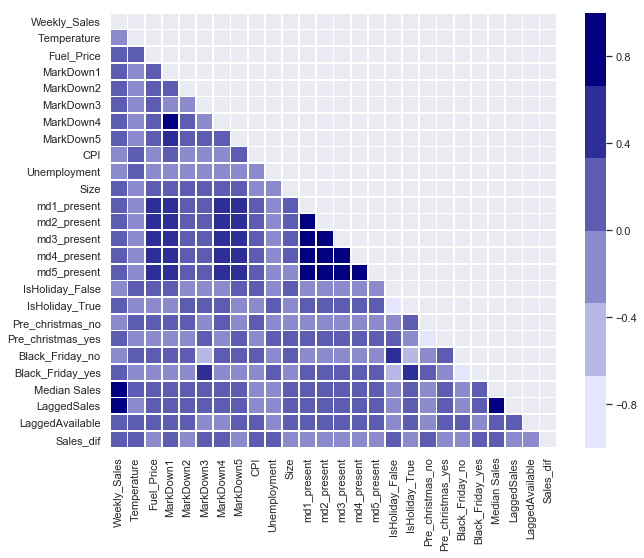

In [542]:
plot_corr(df)

In [543]:
    #We have our entire dataframe ready with all the pre-processing.
    #However, we do not need all these features. We did all these feature processing for us to understand the data better.
    #Now, if we go all these features to the model, some of the features will be repeated. For example, month and date (We do not date if we have month) Granularity at the date level is not needed

#We create the columns we need
cols_needed = [
    'Month',
    'CPI',
    'Fuel_Price',
    'MarkDown1',
    'MarkDown2',
    'MarkDown3',
    'MarkDown4',
    'MarkDown5',
    'Size',
    'Temperature',
    'Unemployment',
    
    
    
    'md1_present',
    'md2_present',
    'md3_present',
    'md4_present',
    'md5_present',

    'IsHoliday_False',
    'IsHoliday_True',
    'Pre_christmas_no',
    'Pre_christmas_yes',
    'Black_Friday_no',
    'Black_Friday_yes',    
    'LaggedSales',
    'Sales_dif',
    'LaggedAvailable'
    ]
data_model=df[cols_needed] #we store the data for model here

In [544]:
data_model.head()

,Month,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,md5_present,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
0,8,136.213613,3.796,0.00,0.0,0.00,0.00,0.00,152513,61.10,...,False,1,0,1,0,1,0,93212.89,0.00,0.0
1,8,138.281452,3.874,4507.08,33.6,149.46,1866.46,4685.63,152513,62.08,...,True,1,0,1,0,1,0,93212.89,0.00,1.0
2,8,136.054032,3.903,0.00,0.0,0.00,0.00,0.00,152513,63.16,...,False,1,0,1,0,1,0,80427.06,12785.83,1.0
3,8,138.143774,3.772,5732.23,17.6,6.45,1524.63,2439.95,152513,67.01,...,True,1,0,1,0,1,0,93890.07,-677.18,1.0
4,8,138.185710,3.840,2430.95,16.0,5.54,829.70,3038.77,152513,65.54,...,True,1,0,1,0,1,0,111812.56,-18599.67,1.0


In [545]:
test.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Split
0,28,40,2012-01-06,False,50.43,3.599,5155.86,19549.51,218.29,636.73,5218.50,130.157516,12.187,A,206302,Test
1,18,93,2012-03-09,False,38.10,3.876,7410.18,368.19,25.46,1852.39,2332.07,137.506690,8.075,B,120653,Test
2,38,4,2011-05-27,False,76.67,4.087,NaN,NaN,NaN,NaN,NaN,129.062355,13.736,C,39690,Test
3,29,33,2010-03-12,False,43.43,2.805,NaN,NaN,NaN,NaN,NaN,131.784000,10.064,B,93638,Test
4,13,52,2010-10-29,False,45.12,2.841,NaN,NaN,NaN,NaN,NaN,126.436419,7.795,A,219622,Test


In [558]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.00,0.00,...,0,1,0,93212.890,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...,2011-08-19,93212.890,0.0,0.000,5977.320
1,Store_26,Dept_92,2012-08-24,88145.09,IsHoliday_False,62.08,3.874,4507.08,33.60,149.46,...,0,1,0,93212.890,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...,2012-08-17,93212.890,1.0,0.000,5067.800
2,Store_26,Dept_92,2011-08-05,96906.53,IsHoliday_False,63.16,3.903,0.00,0.00,0.00,...,0,1,0,93212.890,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...,2011-07-29,80427.060,1.0,12785.830,-3693.640
3,Store_26,Dept_92,2012-08-10,111812.56,IsHoliday_False,67.01,3.772,5732.23,17.60,6.45,...,0,1,0,93212.890,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...,2012-08-03,93890.070,1.0,-677.180,-18599.670
4,Store_26,Dept_92,2012-08-17,93212.89,IsHoliday_False,65.54,3.840,2430.95,16.00,5.54,...,0,1,0,93212.890,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...,2012-08-10,111812.560,1.0,-18599.670,0.000
5,Store_26,Dept_92,2012-08-03,93890.07,IsHoliday_False,65.60,3.698,28330.00,49.21,42.09,...,0,1,0,93212.890,Type_ADept_92Store_262012-08-03 00:00:00IsHoli...,2012-07-27,88557.820,1.0,4655.070,-677.180
6,Store_26,Dept_92,2010-08-13,80498.48,IsHoliday_False,61.58,2.810,0.00,0.00,0.00,...,0,1,0,93212.890,Type_ADept_92Store_262010-08-13 00:00:00IsHoli...,2010-08-06,93212.890,0.0,0.000,12714.410
7,Store_34,Dept_22,2011-03-25,5945.97,IsHoliday_False,53.11,3.480,0.00,0.00,0.00,...,0,1,0,6325.505,Type_ADept_22Store_342011-03-25 00:00:00IsHoli...,2011-03-18,6648.130,1.0,-322.625,379.535
8,Store_34,Dept_22,2011-03-18,6648.13,IsHoliday_False,55.58,3.495,0.00,0.00,0.00,...,0,1,0,6325.505,Type_ADept_22Store_342011-03-18 00:00:00IsHoli...,2011-03-11,6325.505,0.0,0.000,-322.625
9,Store_34,Dept_22,2011-03-04,6393.82,IsHoliday_False,46.21,3.305,0.00,0.00,0.00,...,0,1,0,6325.505,Type_ADept_22Store_342011-03-04 00:00:00IsHoli...,2011-02-25,6325.505,0.0,0.000,-68.315


In [559]:
def model_dataset_split(df):
    df['Difference'] = df['Median Sales'] - df['Weekly_Sales']
    train = df.loc[df['Split']=='Train']
    X_train, X_dev, y_train, y_dev = train_test_split(train[cols_needed], train['Difference'], test_size=0.2, random_state=42)
    return X_train,X_dev,y_train,y_dev,test,train



In [560]:
X_train,X_dev,y_train,y_dev,train,test=model_dataset_split(df)

In [561]:
test.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.0,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...,2011-08-19,93212.89,0.0,0.00,5977.32
1,Store_26,Dept_92,2012-08-24,88145.09,IsHoliday_False,62.08,3.874,4507.08,33.6,149.46,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...,2012-08-17,93212.89,1.0,0.00,5067.80
2,Store_26,Dept_92,2011-08-05,96906.53,IsHoliday_False,63.16,3.903,0.00,0.0,0.00,...,0,1,0,93212.89,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...,2011-07-29,80427.06,1.0,12785.83,-3693.64
3,Store_26,Dept_92,2012-08-10,111812.56,IsHoliday_False,67.01,3.772,5732.23,17.6,6.45,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...,2012-08-03,93890.07,1.0,-677.18,-18599.67
4,Store_26,Dept_92,2012-08-17,93212.89,IsHoliday_False,65.54,3.840,2430.95,16.0,5.54,...,0,1,0,93212.89,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...,2012-08-10,111812.56,1.0,-18599.67,0.00


In [562]:
print(X_dev.shape)
print(y_dev.shape)

(56491, 25)
(56491,)


In [563]:
X_train.head()

,Month,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,md5_present,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
103929,3,209.980321,2.720,0.00,0.00,0.00,0.00,0.00,184109,58.62,...,False,1,0,1,0,1,0,5192.790,0.00,0.0
81975,10,211.861294,2.725,0.00,0.00,0.00,0.00,0.00,151315,69.86,...,False,1,0,1,0,1,0,16713.940,118.25,1.0
227651,12,222.158952,3.172,7019.20,97.47,2917.09,3648.95,28803.28,207499,56.89,...,True,1,0,1,0,1,0,39225.060,0.00,0.0
60626,10,138.833613,4.000,1134.33,0.00,2.15,625.26,1894.98,114533,47.89,...,True,1,0,1,0,1,0,6769.620,-1232.59,1.0
15345,10,142.762411,3.882,6221.06,42.48,103.00,273.90,996.79,103681,58.99,...,True,1,0,1,0,1,0,24928.885,0.00,0.0


In [564]:
X_dev.head()

,Month,CPI,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,Temperature,...,md5_present,IsHoliday_False,IsHoliday_True,Pre_christmas_no,Pre_christmas_yes,Black_Friday_no,Black_Friday_yes,LaggedSales,Sales_dif,LaggedAvailable
5324,7,126.139200,2.668,0.00,0.00,0.00,0.00,0.00,158114,73.66,...,False,1,0,1,0,1,0,21.15,0.000,0.0
219142,12,136.588387,3.413,699.47,0.09,1018.94,9.00,2816.25,152513,22.53,...,True,1,0,0,1,1,0,33528.38,-2787.955,1.0
34975,4,208.477941,3.892,0.00,0.00,0.00,0.00,0.00,128107,45.87,...,False,1,0,1,0,1,0,2593.17,0.000,0.0
14894,8,198.029389,3.528,4801.46,0.00,0.00,3030.35,2945.89,57197,68.59,...,True,1,0,1,0,1,0,6614.08,-4607.400,1.0
252689,10,129.793677,3.727,0.00,0.00,0.00,0.00,0.00,206302,67.41,...,False,1,0,1,0,1,0,2002.84,0.000,0.0


In [565]:
 y_train.head()

103929   -1163.370
81975        0.000
227651    3813.050
60626     1521.850
15345     2812.235
Name: Difference, dtype: float64

In [566]:
y_dev.head()

5324          3.130
219142   -13114.445
34975        12.530
14894     -6080.070
252689      -56.250
Name: Difference, dtype: float64

In [567]:
def train_RandomForest(X_train, y_train):
    #declare the model with specifics
    regr = RandomForestRegressor(n_estimators=20, criterion='mse', max_depth=None, 
                      min_samples_split=2, min_samples_leaf=1, 
                      min_weight_fraction_leaf=0.0, max_features='auto', 
                      max_leaf_nodes=None, min_impurity_decrease=0.0, 
                      min_impurity_split=None, bootstrap=True, 
                      oob_score=False, n_jobs=1, random_state=None, 
                      verbose=2, warm_start=False)

    #Train on data
    regr.fit(X_train, y_train.ravel())
    return regr

In [568]:
rf_model=train_RandomForest(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.2s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.2min finished


In [570]:

y_pred_random= rf_model.predict(X_dev)
y_dev = pd.DataFrame(y_dev)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.9s finished


In [571]:
y_dev.head()

,Difference
5324,3.130
219142,-13114.445
34975,12.530
14894,-6080.070
252689,-56.250


In [572]:
y_dev['Predicted'] = y_pred_random
df_out = pd.merge(train,y_dev[['Predicted']],how = 'left',left_index = True, right_index = True,suffixes=['_True','_Pred'])
df_out = df_out[~pd.isnull(df_out['Predicted'])]
df_out.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Black_Friday_no,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,Predicted
6,Store_26,Dept_92,2010-08-13,80498.48,IsHoliday_False,61.58,2.810,0.00,0.00,0.00,...,1,0,93212.890,Type_ADept_92Store_262010-08-13 00:00:00IsHoli...,2010-08-06,93212.890,0.0,0.000,12714.410,1639.23350
11,Store_34,Dept_22,2010-03-19,5700.03,IsHoliday_False,45.86,2.743,0.00,0.00,0.00,...,1,0,6325.505,Type_ADept_22Store_342010-03-19 00:00:00IsHoli...,2010-03-12,6325.505,0.0,0.000,625.475,179.78675
12,Store_34,Dept_22,2012-03-23,6028.60,IsHoliday_False,47.93,3.759,3662.39,107.42,0.59,...,1,0,6325.505,Type_ADept_22Store_342012-03-23 00:00:00IsHoli...,2012-03-16,6325.505,0.0,0.000,296.905,562.52475
16,Store_21,Dept_28,2010-12-24,1682.56,IsHoliday_False,51.29,2.886,0.00,0.00,0.00,...,1,0,1340.680,Type_BDept_28Store_212010-12-24 00:00:00IsHoli...,2010-12-17,1559.650,1.0,-218.970,-341.880,-228.88825
22,Store_8,Dept_9,2012-09-14,16040.38,IsHoliday_False,67.21,3.717,4678.98,0.00,12.29,...,1,0,13385.715,Type_ADept_9Store_82012-09-14 00:00:00IsHolida...,2012-09-07,23918.090,1.0,-10532.375,-2654.665,-3349.89775


In [573]:
#http://scikit-learn.org/stable/auto_examples/plot_cv_predict.html
def plot_prediction(predicted,true,desciption):
    fig, ax = plt.subplots()
    ax.scatter(true, predicted, edgecolors=(0, 0, 0))
    ax.plot([true.min(), true.max()], [true.min(), true.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted by '+desciption)
    ax.plot([-30,30], [0,0], 'k-')   
    ax.plot([0,0], [-30,30], 'k-')
    plt.show()

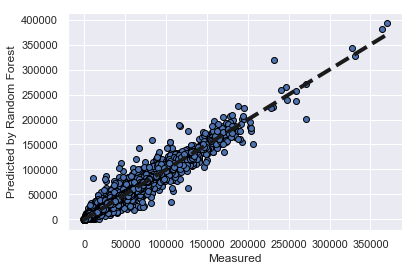

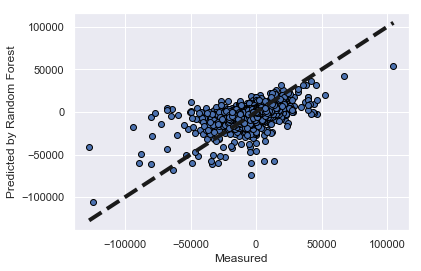

In [574]:
df_out['prediction'] = df_out['Median Sales']-df_out['Predicted']
plot_prediction(df_out['Weekly_Sales'],df_out['prediction'],"Random Forest")
plot_prediction(y_pred_random,y_dev['Difference'].values,"Random Forest")


In [576]:

rf_model=train_RandomForest(train[cols_needed], train['Difference'])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 20


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.9min finished


In [578]:
final_y_prediction = rf_model.predict(test[cols_needed])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.0s finished


In [579]:
testfile = pd.concat([test.reset_index(drop=True), pd.DataFrame(final_y_prediction)], axis=1)
testfile['prediction'] = testfile['Median Sales']-testfile[0]
testfile.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Black_Friday_yes,Median Sales,Key,DateLagged,LaggedSales,LaggedAvailable,Sales_dif,Difference,0,prediction
0,Store_26,Dept_92,2011-08-26,87235.57,IsHoliday_False,61.10,3.796,0.00,0.0,0.00,...,0,93212.89,Type_ADept_92Store_262011-08-26 00:00:00IsHoli...,2011-08-19,93212.89,0.0,0.00,5977.32,4151.94950,89060.94050
1,Store_26,Dept_92,2012-08-24,88145.09,IsHoliday_False,62.08,3.874,4507.08,33.6,149.46,...,0,93212.89,Type_ADept_92Store_262012-08-24 00:00:00IsHoli...,2012-08-17,93212.89,1.0,0.00,5067.80,2307.77375,90905.11625
2,Store_26,Dept_92,2011-08-05,96906.53,IsHoliday_False,63.16,3.903,0.00,0.0,0.00,...,0,93212.89,Type_ADept_92Store_262011-08-05 00:00:00IsHoli...,2011-07-29,80427.06,1.0,12785.83,-3693.64,-1449.38300,94662.27300
3,Store_26,Dept_92,2012-08-10,111812.56,IsHoliday_False,67.01,3.772,5732.23,17.6,6.45,...,0,93212.89,Type_ADept_92Store_262012-08-10 00:00:00IsHoli...,2012-08-03,93890.07,1.0,-677.18,-18599.67,-15385.73775,108598.62775
4,Store_26,Dept_92,2012-08-17,93212.89,IsHoliday_False,65.54,3.840,2430.95,16.0,5.54,...,0,93212.89,Type_ADept_92Store_262012-08-17 00:00:00IsHoli...,2012-08-10,111812.56,1.0,-18599.67,0.00,-1034.40975,94247.29975
